## Import libraries and load data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.stats import wilcoxon, pearsonr, spearmanr

In [18]:
times_df = pd.read_csv('CCIR-laptimes.csv')

# Convert time string to total seconds 
def time_to_seconds(time_str): 
    minute, sec_millisec = time_str.split(':') 
    seconds, milliseconds = sec_millisec.split('.') 
    total_seconds = int(minute) * 60 + int(seconds) + float(milliseconds) / 1000 
    return total_seconds 
times_df['Lap-Time'] = times_df['Time'].apply(time_to_seconds)

times_df


,ID,Session,Track,Intervention,Lap,Sector 1,Sector 2,Sector 3,Sector 4,Time,Lap-Time
0,1,1,A,No,1,28.796,25.188,33.714,NaN,1:27.698,87.698
1,1,1,A,No,2,27.284,23.714,33.370,NaN,1:24.369,84.369
2,1,1,A,No,3,27.083,30.476,34.329,NaN,1:31.889,91.889
3,1,2,B,Yes,1,24.082,28.415,14.998,14.876,1:22.373,82.373
4,1,2,B,Yes,2,23.952,27.873,14.943,14.852,1:21.621,81.621
5,1,2,B,Yes,3,30.139,27.964,14.787,14.953,1:27.844,87.844
6,2,1,B,Yes,1,23.917,27.496,14.849,14.804,1:21.067,81.067
7,2,1,B,Yes,2,23.617,27.419,14.494,14.773,1:20.306,80.306
8,2,1,B,Yes,3,23.559,27.202,14.479,14.812,1:20.055,80.055
9,2,2,A,No,1,28.220,23.831,31.849,NaN,1:23.901,83.901


In [39]:
bios_df = pd.read_csv('CCIR-biometrics.csv')
bios_df.dropna(subset=['Intervention'], inplace=True)
bios_df

,ID,Session,Track,Intervention,HR rest,HR max,RR rest,HR avg session,HR max session,RR avg session,...,Session confidence,Session stress,Extraversion,Risk tolerance,Stress resilience,Open-mindedness,Conscientiousness,Agreeableness,Emotional stability,Self-efficacy
1,1,1,A,No,69,228,15,106,129,24,...,5.0,6.0,3.0,4.0,2.0,3.0,4.0,3.0,3.0,4.0
2,1,2,B,Yes,69,228,15,104,124,22,...,4.0,6.0,3.0,4.0,2.0,3.0,4.0,3.0,3.0,4.0
4,2,1,B,Yes,52,216,14,79,91,20,...,8.0,4.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,5.0
5,2,2,A,No,52,216,14,80,103,19,...,7.0,8.0,4.0,4.0,4.0,4.0,3.0,3.0,4.0,5.0
7,3,1,A,Yes,61,206,14,92,107,22,...,4.0,3.0,5.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0
8,3,2,B,No,61,206,14,84,97,17,...,5.0,4.0,5.0,2.0,3.0,4.0,4.0,4.0,3.0,4.0
10,4,1,B,No,74,212,16,121,144,22,...,7.0,4.0,3.0,4.0,4.0,3.0,5.0,4.0,4.0,4.0
11,4,2,A,Yes,74,212,16,113,137,22,...,9.0,6.0,3.0,4.0,4.0,3.0,5.0,4.0,4.0,4.0


In [ ]:
# Define a color palette with one color per participant
palette = sns.color_palette("husl", len(times_df['ID'].unique()))

## Lap-times

### Lap-time by intervention

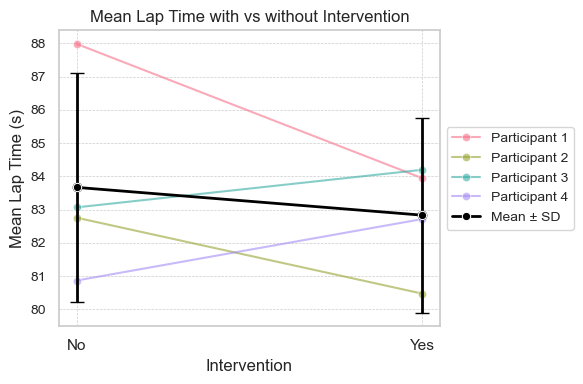

In [43]:
# Group by ID, Intervention and calculate mean and standard deviation
grouped = times_df.groupby(['ID', 'Intervention'])['Lap-Time'].agg(['mean', 'std']).reset_index()

# Use color palette 
participant_colors = {participant_id: palette[i] for i, participant_id in enumerate(grouped['ID'].unique())}

# Create the plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Plot lines for individual participants
for participant_id in grouped['ID'].unique():
    participant_data = grouped[grouped['ID'] == participant_id]
    sns.lineplot(x='Intervention', y='mean', data=participant_data, marker='o', linestyle='-', color=participant_colors[participant_id], label=f'Participant {participant_id}', alpha=0.6)

# Plot mean and standard deviation with error bars
mean_data = times_df.groupby('Intervention')['Lap-Time'].agg(['mean', 'std']).reset_index()
sns.lineplot(x='Intervention', y='mean', data=mean_data, marker='o', color='black', linewidth=2, label='Mean ± SD', zorder=10)
plt.errorbar(mean_data['Intervention'], mean_data['mean'], yerr=mean_data['std'], fmt='o', color='black', capsize=5, elinewidth=2, zorder=5)

plt.title('Mean Lap Time with vs without Intervention', fontsize=12)
plt.xlabel('Intervention', fontsize=12)
plt.ylabel('Mean Lap Time (s)', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.show()


##### Wilcoxon Signed Rank Test

In [35]:
# Group by ID, Intervention and calculate mean and standard deviation
grouped = times_df.groupby(['ID', 'Intervention'])['Lap-Time'].agg(['mean', 'std']).reset_index()

# Extract the lap times for each participant under intervention and no intervention
intervention_times = grouped[grouped['Intervention'] == 'Yes']['mean'].values
no_intervention_times = grouped[grouped['Intervention'] == 'No']['mean'].values

# Run the Wilcoxon signed-rank test
stat, p = wilcoxon(intervention_times, no_intervention_times)
print(f'Wilcoxon test statistic: {stat}, p-value: {p}')

# Calculate median lap times for intervention and no intervention
median_intervention = grouped[grouped['Intervention'] == 'Yes']['mean'].median()
median_no_intervention = grouped[grouped['Intervention'] == 'No']['mean'].median()
print(f'Median lap time with intervention: {round(median_intervention, 2)} seconds')
print(f'Median lap time without intervention: {round(median_no_intervention, 2)} seconds')

Wilcoxon test statistic: 3.0, p-value: 0.625
Median lap time with intervention: 83.33 seconds
Median lap time without intervention: 82.91 seconds


In [38]:
print("\nResults of the Wilcoxon Signed-Rank Test\n")
print(f"Median lap time was {round(median_intervention, 2)} seconds with intervention and {round(median_no_intervention, 2)} seconds without intervention\n"
      f"A Wilcoxon signed-rank test was conducted to compare the lap times with and without intervention.\n"
      f"The results indicated that the difference in lap times was not statistically significant, W = {stat}, p = {round(p, 3)}.\n"
      f"This suggests that the visualization intervention did not have a significant effect on the participants' racing track times.")



Results of the Wilcoxon Signed-Rank Test

Median lap time was 83.33 seconds with intervention and 82.91 seconds without intervention
A Wilcoxon signed-rank test was conducted to compare the lap times with and without intervention.
The results indicated that the difference in lap times was not statistically significant, W = 3.0, p = 0.625.
This suggests that the visualization intervention did not have a significant effect on the participants' racing track times.


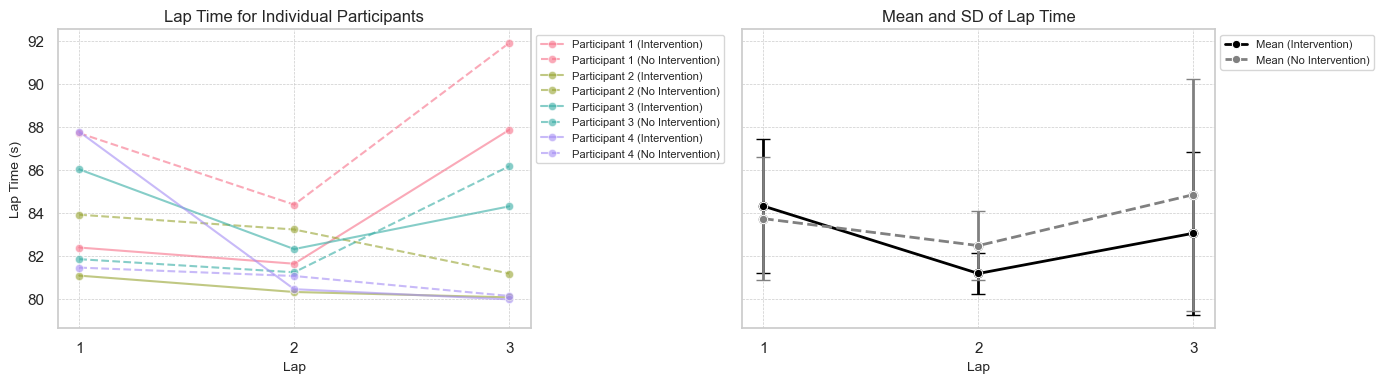

In [25]:
# Split by lap number
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

# Use color palette 
participant_colors = {participant_id: palette[i] for i, participant_id in enumerate(times_df['ID'].unique())}

# Plot lines for each participant and each intervention condition in the first subplot
for participant_id in times_df['ID'].unique():
    participant_data = times_df[times_df['ID'] == participant_id]
    
    # Plot for Intervention
    intervention_data = participant_data[participant_data['Intervention'] == 'Yes']
    sns.lineplot(ax=axs[0], x='Lap', y='Lap-Time', data=intervention_data, marker='o', linestyle='-', color=participant_colors[participant_id], label=f'Participant {participant_id} (Intervention)', alpha=0.6)
    
    # Plot for No Intervention
    no_intervention_data = participant_data[participant_data['Intervention'] == 'No']
    sns.lineplot(ax=axs[0], x='Lap', y='Lap-Time', data=no_intervention_data, marker='o', linestyle='--', color=participant_colors[participant_id], label=f'Participant {participant_id} (No Intervention)', alpha=0.6)

axs[0].set_title('Lap Time for Individual Participants', fontsize=12)
axs[0].set_xlabel('Lap', fontsize=10)
axs[0].set_ylabel('Lap Time (s)', fontsize=10)
axs[0].set_xticks([1, 2, 3])
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot mean and standard deviation with error bars for all participants in the second subplot
mean_data = times_df.groupby(['Lap', 'Intervention'])['Lap-Time'].agg(['mean', 'std']).reset_index()

# Plot for Intervention
mean_intervention = mean_data[mean_data['Intervention'] == 'Yes']
sns.lineplot(ax=axs[1], x='Lap', y='mean', data=mean_intervention, marker='o', color='black', linewidth=2, label='Mean (Intervention)', zorder=10, linestyle='-')
axs[1].errorbar(mean_intervention['Lap'], mean_intervention['mean'], yerr=mean_intervention['std'], fmt='o', color='black', capsize=5, elinewidth=2, zorder=5)

# Plot for No Intervention
mean_no_intervention = mean_data[mean_data['Intervention'] == 'No']
sns.lineplot(ax=axs[1], x='Lap', y='mean', data=mean_no_intervention, marker='o', color='gray', linewidth=2, label='Mean (No Intervention)', zorder=10, linestyle='--')
axs[1].errorbar(mean_no_intervention['Lap'], mean_no_intervention['mean'], yerr=mean_no_intervention['std'], fmt='o', color='gray', capsize=5, elinewidth=2, zorder=5)

axs[1].set_title('Mean and SD of Lap Time', fontsize=12)
axs[1].set_xlabel('Lap', fontsize=10)
axs[1].set_xticks([1, 2, 3])
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


### Lap-time by track

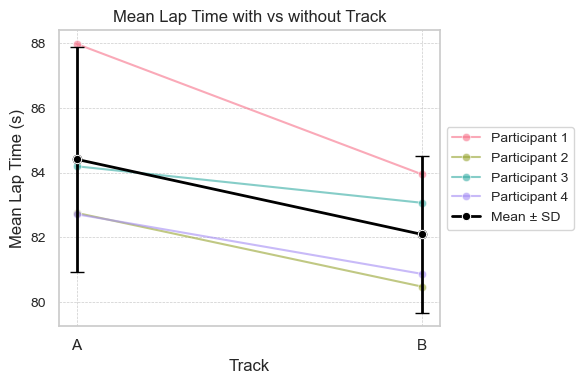

In [44]:
# Group by ID, Track and calculate mean and standard deviation
grouped = times_df.groupby(['ID', 'Track'])['Lap-Time'].agg(['mean', 'std']).reset_index()

# Use color palette 
participant_colors = {participant_id: palette[i] for i, participant_id in enumerate(grouped['ID'].unique())}

# Create the plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Plot lines for individual participants
for participant_id in grouped['ID'].unique():
    participant_data = grouped[grouped['ID'] == participant_id]
    sns.lineplot(x='Track', y='mean', data=participant_data, marker='o', linestyle='-', color=participant_colors[participant_id], label=f'Participant {participant_id}', alpha=0.6)

# Plot mean and standard deviation with error bars
mean_data = times_df.groupby('Track')['Lap-Time'].agg(['mean', 'std']).reset_index()
sns.lineplot(x='Track', y='mean', data=mean_data, marker='o', color='black', linewidth=2, label='Mean ± SD', zorder=10)
plt.errorbar(mean_data['Track'], mean_data['mean'], yerr=mean_data['std'], fmt='o', color='black', capsize=5, elinewidth=2, zorder=5)

plt.title('Mean Lap Time with vs without Track', fontsize=12)
plt.xlabel('Track', fontsize=12)
plt.ylabel('Mean Lap Time (s)', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.show()


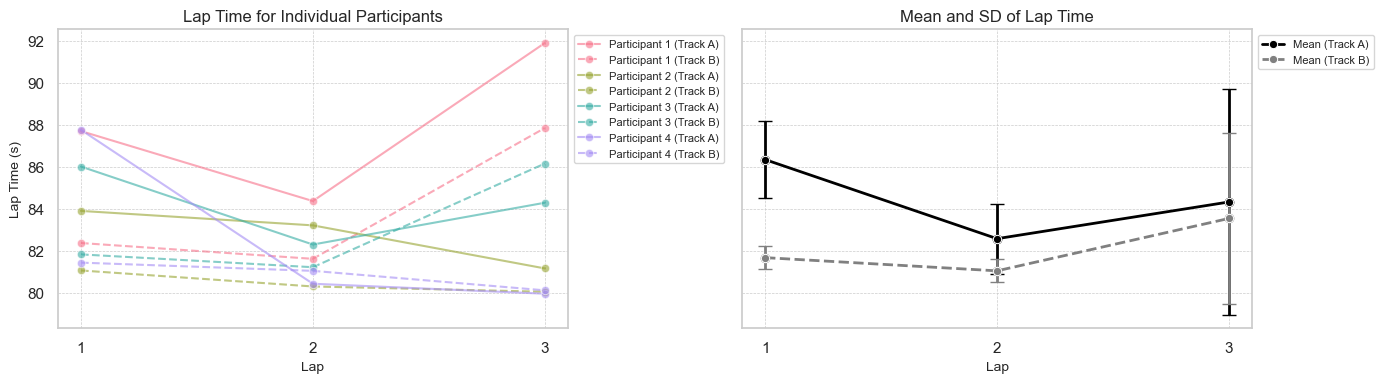

In [27]:
# Split by lap number
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(14, 4), sharey=True)

# Use color palette
participant_colors = {participant_id: palette[i] for i, participant_id in enumerate(times_df['ID'].unique())}

# Plot lines for each participant and each intervention condition in the first subplot
for participant_id in times_df['ID'].unique():
    participant_data = times_df[times_df['ID'] == participant_id]
    
    # Plot for Track A
    trackA_data = participant_data[participant_data['Track'] == 'A']
    sns.lineplot(ax=axs[0], x='Lap', y='Lap-Time', data=trackA_data, marker='o', linestyle='-', color=participant_colors[participant_id], label=f'Participant {participant_id} (Track A)', alpha=0.6)
    
    # Plot for Track B
    trackB_data = participant_data[participant_data['Track'] == 'B']
    sns.lineplot(ax=axs[0], x='Lap', y='Lap-Time', data=trackB_data, marker='o', linestyle='--', color=participant_colors[participant_id], label=f'Participant {participant_id} (Track B)', alpha=0.6)

axs[0].set_title('Lap Time for Individual Participants', fontsize=12)
axs[0].set_xlabel('Lap', fontsize=10)
axs[0].set_ylabel('Lap Time (s)', fontsize=10)
axs[0].set_xticks([1, 2, 3])
axs[0].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
axs[0].grid(True, which='both', linestyle='--', linewidth=0.5)

# Plot mean and standard deviation with error bars for all participants in the second subplot
mean_data = times_df.groupby(['Lap', 'Track'])['Lap-Time'].agg(['mean', 'std']).reset_index()

# Plot for Track A
mean_intervention = mean_data[mean_data['Track'] == 'A']
sns.lineplot(ax=axs[1], x='Lap', y='mean', data=mean_intervention, marker='o', color='black', linewidth=2, label='Mean (Track A)', zorder=10, linestyle='-')
axs[1].errorbar(mean_intervention['Lap'], mean_intervention['mean'], yerr=mean_intervention['std'], fmt='o', color='black', capsize=5, elinewidth=2, zorder=5)

# Plot for Track B
mean_no_intervention = mean_data[mean_data['Track'] == 'B']
sns.lineplot(ax=axs[1], x='Lap', y='mean', data=mean_no_intervention, marker='o', color='gray', linewidth=2, label='Mean (Track B)', zorder=10, linestyle='--')
axs[1].errorbar(mean_no_intervention['Lap'], mean_no_intervention['mean'], yerr=mean_no_intervention['std'], fmt='o', color='gray', capsize=5, elinewidth=2, zorder=5)

axs[1].set_title('Mean and SD of Lap Time', fontsize=12)
axs[1].set_xlabel('Lap', fontsize=10)
axs[1].set_xticks([1, 2, 3])
axs[1].legend(loc='upper left', bbox_to_anchor=(1, 1), fontsize=8)
axs[1].grid(True, which='both', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.show()


### Lap-time by stress resilience

### Lap time by self-reported stress, etc.. :) 

## Biometrics

### Heart-rate by intervention

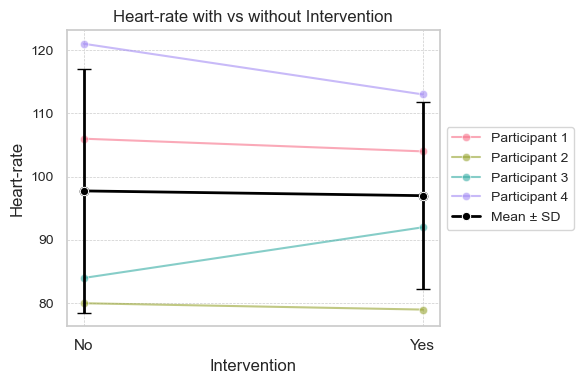

In [45]:
# Group by ID, Intervention and calculate mean and standard deviation
grouped = bios_df.groupby(['ID', 'Intervention'])['HR avg session'].agg(['mean', 'std']).reset_index()

# Use color palette 
participant_colors = {participant_id: palette[i] for i, participant_id in enumerate(grouped['ID'].unique())}

# Create the plot
sns.set(style="whitegrid")
plt.figure(figsize=(6, 4))

# Plot lines for individual participants
for participant_id in grouped['ID'].unique():
    participant_data = grouped[grouped['ID'] == participant_id]
    sns.lineplot(x='Intervention', y='mean', data=participant_data, marker='o', linestyle='-', color=participant_colors[participant_id], label=f'Participant {participant_id}', alpha=0.6)

# Plot mean and standard deviation with error bars
mean_data = bios_df.groupby('Intervention')['HR avg session'].agg(['mean', 'std']).reset_index()
sns.lineplot(x='Intervention', y='mean', data=mean_data, marker='o', color='black', linewidth=2, label='Mean ± SD', zorder=10)
plt.errorbar(mean_data['Intervention'], mean_data['mean'], yerr=mean_data['std'], fmt='o', color='black', capsize=5, elinewidth=2, zorder=5)

plt.title('Heart-rate with vs without Intervention', fontsize=12)
plt.xlabel('Intervention', fontsize=12)
plt.ylabel('Heart-rate', fontsize=12)
plt.yticks(fontsize=10)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=10)
plt.tight_layout()
plt.show()
